In [1]:
cd ../src

/Users/dani/Google Drive/Uni/Master/P4 2021/DD2424 - Deep Learning for Data Science/Project/ScarceClassifier/src


In [27]:
from d04_mixmatch.wideresnet import WideResNet
from d02_data.load_data import get_dataloaders_ssl
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [3]:
model_name = 'model_fs_sgd_aug.pt'
saved_model = torch.load(f'../models/saved_models/{model_name}', map_location=torch.device('cpu')) 

model = WideResNet(depth=28, k=2, n_out=10)
model.load_state_dict(saved_model['model_state_dict'])

<All keys matched successfully>

In [5]:
from torchsummary import summary
summary(model, (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             448
       BatchNorm2d-2           [-1, 16, 32, 32]              32
         LeakyReLU-3           [-1, 16, 32, 32]               0
            Conv2d-4           [-1, 32, 32, 32]             544
            Conv2d-5           [-1, 32, 32, 32]           4,640
       BatchNorm2d-6           [-1, 32, 32, 32]              64
         LeakyReLU-7           [-1, 32, 32, 32]               0
            Conv2d-8           [-1, 32, 32, 32]           9,248
   TransitionBlock-9           [-1, 32, 32, 32]               0
      BatchNorm2d-10           [-1, 32, 32, 32]              64
        LeakyReLU-11           [-1, 32, 32, 32]               0
           Conv2d-12           [-1, 32, 32, 32]           9,248
      BatchNorm2d-13           [-1, 32, 32, 32]              64
        LeakyReLU-14           [-1, 32,

In [16]:
kernels = model.conv1.weight
for i in range(kernels.shape[0]):
    

tensor(-0.6968, grad_fn=<MinBackward1>)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


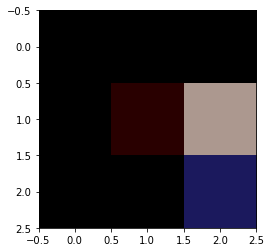

In [41]:
kernels = model.conv1.weight.detach()
plt.imshow(np.transpose(kernels[14], (1, 2, 0)))

In [11]:
l= [module for module in model.modules()]
l

[WideResNet(
   (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (conv_group1): ConvGroup(
     (conv_blocks): Sequential(
       (0): TransitionBlock(
         (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.001, affine=True, track_running_stats=True)
         (relu): LeakyReLU(negative_slope=0.1)
         (conv1): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
         (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.001, affine=True, track_running_stats=True)
         (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
         (shortcut): Conv2d(16, 32, kernel_size=(1, 1), stride=(1, 1))
       )
       (1): BasicBlock(
         (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.001, affine=True, track_running_stats=True)
         (relu): LeakyReLU(negative_slope=0.1)
         (conv1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
         (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.001, affine=True, trac